В цьому домашньому завданні кожне завдання оцінюється по 10 балів.

 **Завдання 1.** Після перегляду лекцій про поняття функії, вступ до лінійної алгебри і мат. формулювання лін. регресії знайдіть найкращу лінію для прогнозу `charges` за `age` **для некурців** (датафрейм `non_smoker_df`) з допомогою

1. Методу МНК (з використанням тільки `numpy`, без `scikit learn`)

2. Full-Batch градієнтного спуску з `numpy` . Протестуйте 3 різних learning rate і зробіть висновок, який є найкращим виходячи з практик для цього, наведених в лекції. Зверніть увагу, що на вхід треба набір даних дворозміний, для цього можливо треба буде трансформувати Ваші дані X в формат, як був в лекції "Математичне формулювання лінійної регресії". Також, градієнтний спуск в нашому випадку може розходитись з навчальним рейтом 0.1, бо цей рейт в цій задачі завеликий. Спробуйте нижчі рейти.
3. З `scikit-learn.LinearRegression`. Тут зверніть увагу, що вхід `X` має бути двовимірним масивом, тому нам потрібно передати dataframe, а не окрему колонку. Якщо у Вас X - колонка (а у Вас так мало б бути), то можна скористатись `X.to_frame()` щоб конвертувати колонку в датафрейм.

Для кожного методу
- знайдіть і виведіть коефіцієнти моделі
- обчисліть прогнози моделі і збережіть в окрему змінну
- порахуйте точність прогнозу RMSE  

Для градієнтного спуску виведіть графік помилки в залежності від ітерації.

А також побудуйте на одному графіку дані `age` проти `charges` в вигляді діаграми розсіювання і всі три лінії регресії, знайдені кожним з методів (для град. спуску оберіть варіант з тим learning rate, який виявився найкращим).

Зробіть висновки, чи відрізняються результати моделей?
Чи є знайдені параметри моделі близькими до ваших найкращих припущень?

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd
medical_df = pd.read_csv('drive/MyDrive/2025HP/03_Supervised_Learning/2025-06-06 Аналіз ознак для побудови лінійної регресії/medical-charges.csv')
non_smoker_df = medical_df[medical_df.smoker == 'no']

In [3]:
non_smoker_df

,age,sex,bmi,children,smoker,region,charges
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
...,...,...,...,...,...,...,...
1332,52,female,44.700,3,no,southwest,11411.68500
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350


**1**

In [4]:
import numpy as np
import matplotlib.pyplot as plt

x_vals = non_smoker_df['age'].values
y_vals = non_smoker_df['charges'].values

In [5]:
def rmse(df, absc, ord, w, b):
  x = df[absc].values
  y = df[ord].values
  y_pred = w * x + b
  mse = np.mean((y - y_pred) ** 2)
  return float(np.sqrt(mse))

In [6]:
def normal_equations(X,y):
    """Computes the closed-form solution to linear regression"""
    theta = np.linalg.inv(X.T.dot(X)).dot(X.T).dot(y)
    return theta

In [7]:
X = non_smoker_df[['age']]
X.shape

(1064, 1)

In [8]:
# Додаємо колонку одиничок аби задачи bias терм (константу в моделі регресії)
X_with_intercept = np.c_[np.ones((X.shape[0], 1)), X]
X[:3], X_with_intercept[:3]

(   age
 1   18
 2   28
 3   33,
 array([[ 1., 18.],
        [ 1., 28.],
        [ 1., 33.]]))

In [9]:
pred_mod_1 = normal_equations(X_with_intercept, non_smoker_df['charges'])
pred_mod_1

array([-2091.42055657,   267.24891283])

In [10]:
predictions_MLS = np.dot(X_with_intercept, pred_mod_1)
predictions_MLS

array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289])

In [11]:
rmse_1 = rmse(non_smoker_df, 'age', 'charges', pred_mod_1[1], pred_mod_1[0])
rmse_1

4662.505766636395

**2**

In [12]:
x_vals = non_smoker_df['age'].values
y_vals = non_smoker_df['charges'].values

In [13]:
# Градієнтний спуск
def full_batch_gradient_descent(X, y, lr=0.1, epochs=100):
    m, b = 0.0, 0.0  # Початкові параметри
    n = len(y)
    errors = []
    for _ in range(epochs):
        y_pred = m * X + b
        error = y_pred - y
        errors.append(sum(error**2))
        m_gradient = (2/n) * np.dot(error, X)
        b_gradient = (2/n) * np.sum(error)
        m = m - lr * m_gradient
        b = b - lr * b_gradient
    return m, b, errors

In [14]:
m_1, b_1, errors_1 = full_batch_gradient_descent(x_vals, y_vals, lr=0.000001, epochs=100000)
predictions_fbgd = m_1 * x_vals + b_1

m_1, b_1

(np.float64(221.10457266811318), np.float64(-41.98074838885027))

In [15]:
rmse_2_1 = rmse(non_smoker_df, 'age', 'charges', m_1, b_1)
rmse_2_1

4713.250608434683

In [16]:
Predections_2_1 = m_1 * non_smoker_df['age'].values + b_1
Predections_2_1

array([3937.90155964, 6148.94728632, 7254.47014966, ..., 3937.90155964,
       3937.90155964, 4601.21527764])

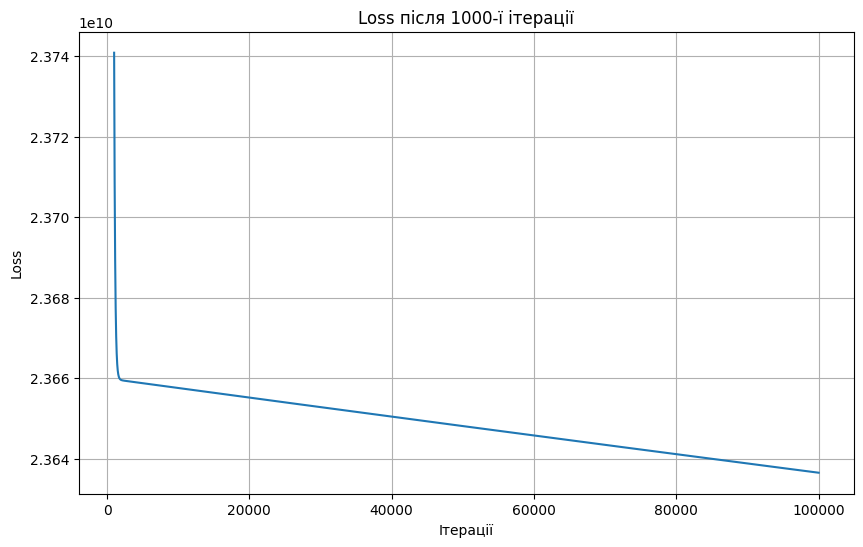

In [17]:
plt.figure(figsize=(10, 6))
plt.plot(range(1000, len(errors_1)), errors_1[1000:])  # обрізати перші 1000 ітерацій
plt.xlabel('Ітерації')
plt.ylabel('Loss')
plt.title('Loss після 1000-ї ітерації')
plt.grid(True)
plt.show()

In [18]:
m_2, b_2, errors_2 = full_batch_gradient_descent(x_vals, y_vals, lr=0.00001, epochs=100000)
predictions_fbgd = m_2 * x_vals + b_2

m_2, b_2

(np.float64(229.61200062335735), np.float64(-419.8269036279835))

In [19]:
rmse_2_2 = rmse(non_smoker_df, 'age', 'charges', m_2, b_2)
rmse_2_2

4696.325306932077

In [20]:
Predections_2_2 = m_2 * non_smoker_df['age'].values + b_2
Predections_2_2

array([3713.18910759, 6009.30911383, 7157.36911694, ..., 3713.18910759,
       3713.18910759, 4402.02510946])

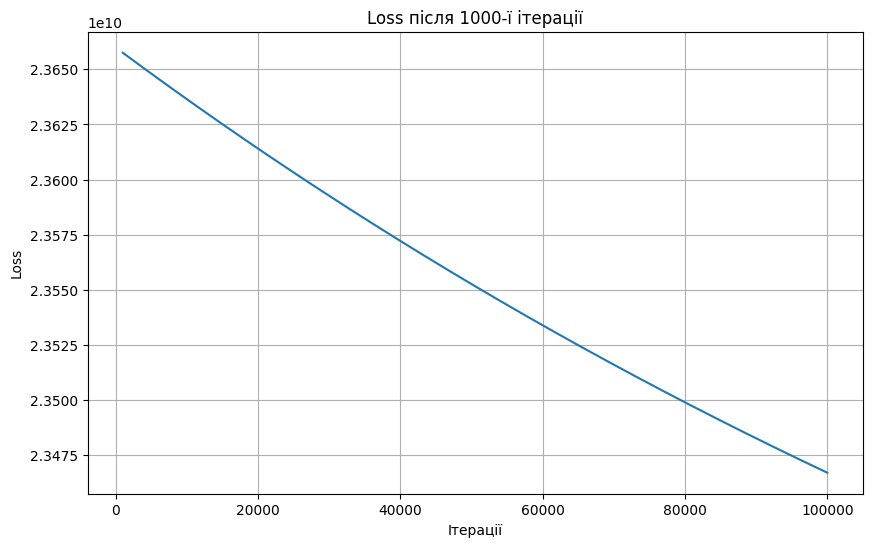

In [21]:
plt.figure(figsize=(10, 6))
plt.plot(range(1000, len(errors_2)), errors_2[1000:])  # обрізати перші 1000 ітерацій
plt.xlabel('Ітерації')
plt.ylabel('Loss')
plt.title('Loss після 1000-ї ітерації')
plt.grid(True)
plt.show()

In [22]:
m_3, b_3, errors_3 = full_batch_gradient_descent(x_vals, y_vals, lr=0.0001, epochs=100000)
predictions_fbgd = m_3 * x_vals + b_3

m_3, b_3

(np.float64(262.34481049895373), np.float64(-1873.6113407966325))

In [23]:
Predections_2_3 = m_3 * non_smoker_df['age'].values + b_3
Predections_2_3

array([2848.59524818, 5472.04335317, 6783.76740567, ..., 2848.59524818,
       2848.59524818, 3635.62967968])

In [24]:
rmse_2_3 = rmse(non_smoker_df, 'age', 'charges', m_3, b_3)
rmse_2_3

4663.082007655704

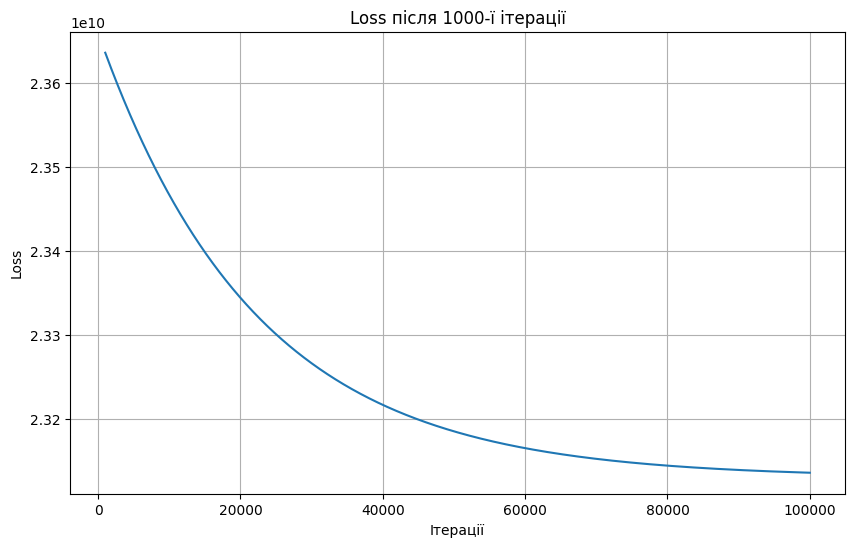

In [25]:
plt.figure(figsize=(10, 6))
plt.plot(range(1000, len(errors_3)), errors_3[1000:])  # обрізати перші 1000 ітерацій
plt.xlabel('Ітерації')
plt.ylabel('Loss')
plt.title('Loss після 1000-ї ітерації')
plt.grid(True)
plt.show()

Найкращі результати показав lr = 0.0001, при якому спостерігалося стійке зменшення помилки, хороша збіжність і адекватний рівень RMSE (помилки прогнозу).
При lr = 0.00001 та lr = 0.000001 збіжність була стабільною також, а RMSE трохи вищий.

**3**

In [26]:
from sklearn.linear_model import LinearRegression

# Модель лінійної регресії засобами Scikit-learn (МНК)
lin_reg = LinearRegression()


In [27]:
lin_reg.fit(non_smoker_df[['age']], non_smoker_df['charges'])

LinearRegression()

In [28]:
lin_reg.coef_, lin_reg.intercept_

(array([267.24891283]), np.float64(-2091.4205565650864))

In [29]:
predictions_sklearn = lin_reg.predict(non_smoker_df[['age']])
predictions_sklearn

array([2719.0598744 , 5391.54900271, 6727.79356686, ..., 2719.0598744 ,
       2719.0598744 , 3520.80661289])

In [30]:
rmse_3 = rmse(non_smoker_df, 'age', 'charges', lin_reg.coef_, lin_reg.intercept_)
rmse_3

4662.505766636395

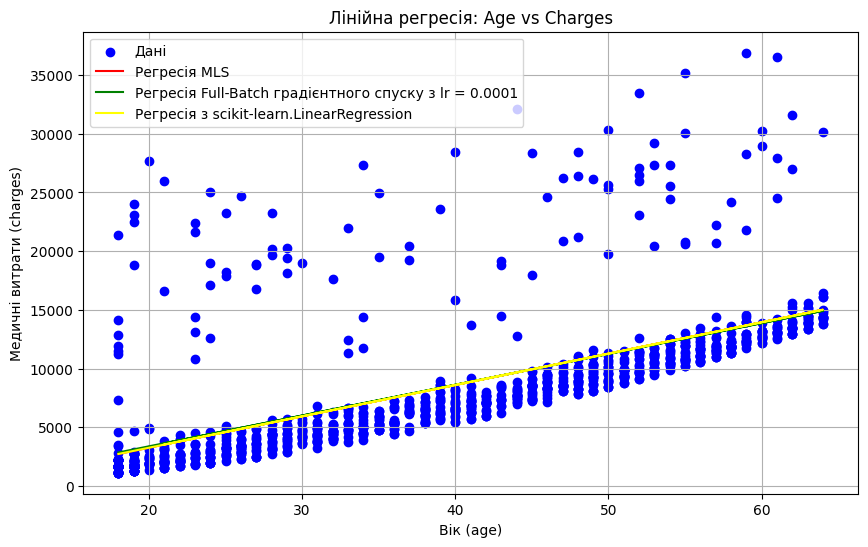

In [31]:
plt.figure(figsize=(10, 6))
plt.scatter(x_vals, y_vals, color='blue', label='Дані')
plt.plot(x_vals, predictions_MLS, color='red', label='Регресія MLS')
plt.plot(x_vals, Predections_2_3, color='green', label='Регресія Full-Batch градієнтного спуску з lr = 0.0001')
plt.plot(x_vals, predictions_sklearn, color='yellow', label='Регресія з scikit-learn.LinearRegression')
plt.xlabel('Вік (age)')
plt.ylabel('Медичні витрати (charges)')
plt.title('Лінійна регресія: Age vs Charges')
plt.legend()
plt.grid(True)
plt.show()

**Висновки** Результати моделей однакові, а параметри співпадають з найкращими припущеннями

 **Завдання 2.** Навчіть модель лінійної регресії з допомогою sklearn оцінювати розмір медичних збори для **курців** за їх віком.
Виведіть
- точність моделі
-  коефіцієнти
-  візуалізуйте модель у вигляді лінії на графіку розсіювання `age` проти `charges`

і зробіть висновки, чи це хороша модель, чи ви б її використовували в компанії?

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [33]:
# Фільтруємо: курці
smokers_df = medical_df[medical_df['smoker'] == 'yes']
smokers_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
11,62,female,26.290,0,yes,southeast,27808.72510
14,27,male,42.130,0,yes,southeast,39611.75770
19,30,male,35.300,0,yes,southwest,36837.46700
23,34,female,31.920,1,yes,northeast,37701.87680
...,...,...,...,...,...,...,...
1313,19,female,34.700,2,yes,southwest,36397.57600
1314,30,female,23.655,3,yes,northwest,18765.87545
1321,62,male,26.695,0,yes,northeast,28101.33305
1323,42,female,40.370,2,yes,southeast,43896.37630


In [34]:
# Вибираємо ознаку (вік) і ціль (медичні витрати)
X = smokers_df[['age']]  # має бути 2D
y = smokers_df['charges']

In [35]:
# Створюємо та навчаємо модель
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [36]:
# Отримаємо прогноз
y_pred = model.predict(X)

In [37]:
# 1. Точність (коефіцієнт детермінації R²)
r2 = r2_score(y, y_pred)
mse = mean_squared_error(y, y_pred)

In [38]:
# 2. Коефіцієнти
omega = model.coef_[0]
b = model.intercept_
omega, b

(np.float64(305.2376021098288), np.float64(20294.128126915966))

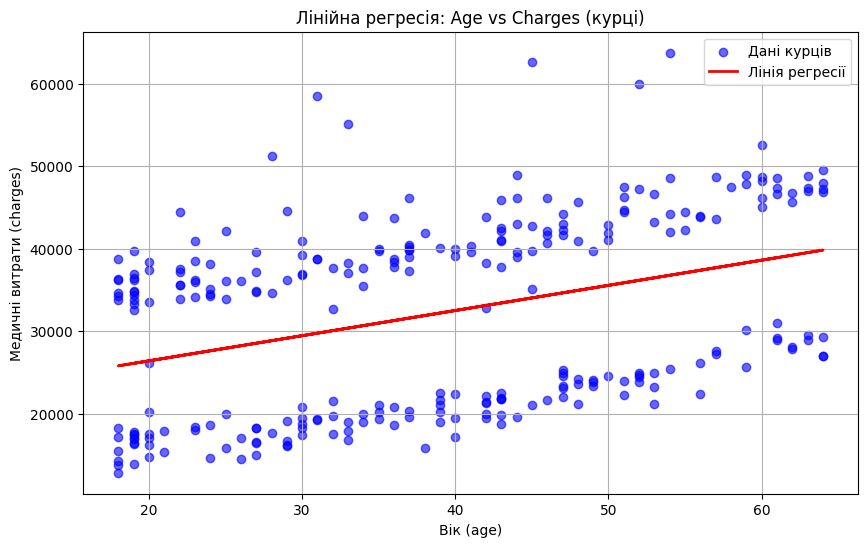

In [40]:
# 3. Графік
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', alpha=0.6, label='Дані курців')
plt.plot(X, y_pred, color='red', linewidth=2, label='Лінія регресії')
plt.xlabel('Вік (age)')
plt.ylabel('Медичні витрати (charges)')
plt.title('Лінійна регресія: Age vs Charges (курці)')
plt.legend()
plt.grid(True)
plt.show()


In [41]:
# 4. Виведення результатів
print(f"R² score: {r2:.4f}")
print(f"MSE: {mse:.2f}")
print(f"Коефіцієнт omega (нахил): {omega:.2f}")
print(f"Зсув b (intercept): {b:.2f}")

R² score: 0.1356
MSE: 114725592.72
Коефіцієнт omega (нахил): 305.24
Зсув b (intercept): 20294.13


## Лінійна регресія: Age vs Charges (курці)

У цій моделі ми дослідили зв’язок між віком (`age`) та медичними витратами (`charges`) серед курців, використовуючи просту лінійну регресію.

Отримане рівняння регресії має вигляд:

charges ≈ 305.24 × age + 20294.13

Це означає, що для кожного додаткового року життя у курців медичні витрати в середньому збільшуються на ~305 доларів.

## Оцінка якості моделі

- R² score = 0.1356  
  Це означає, що лише ~13.5% змін у `charges` можна пояснити віком. Решта варіації викликана іншими факторами.

- MSE (Mean Squared Error) = 114275592.72  
  Високе значення MSE вказує на те, що індивідуальні прогнози мають значну похибку.

- Висновок:**  
  Незважаючи на позитивний нахил, вік сам по собі є слабким предиктором витрат серед курців.


## Висновки та наступні кроки

1. Фактор "куріння" сам по собі суттєво впливає на витрати, тож серед курців медичні витрати вже високі, навіть у молодому віці.
2. Однієї змінної `age` недостатньо для побудови якісної моделі.

### Подальші кроки:
- Додати більше ознак: `bmi`, `children`, `sex`, `region` тощо.
- Побудувати множинну лінійну регресію.
- Виконати one-hot кодування для категоріальних змінних (`sex`, `region`).
- Оцінити якість багатофакторної моделі та порівняти з поточною.
